In [1]:
### Stock Market Prediction And Forecasting

In [2]:
import pandas_datareader as pdr

In [3]:
#pandas-datareader is library that pulls live or historical market/data feeds directly into a Pandas DataFrame so we can start analysing right away.

In [4]:
key="4d6204375bff8aef829d76343a802479a1c0e655"

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

TypeError: concat() takes 1 positional argument but 2 were given

In [6]:
import pandas, pandas_datareader
print("pandas:", pandas.__version__)
print("pandas_datareader:", pandas_datareader.__version__)

pandas: 2.2.3
pandas_datareader: 0.10.0


In [78]:
import requests, pandas as pd
ticker = "AAPL"

url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
params = {
    "startDate": "2021-01-04",   # change as needed
    "endDate": "2025-09-28",
    "format": "json",
    "token": key
}

response = requests.get(url, params=params)
df = pd.DataFrame(response.json())
df.to_csv("AAPL.csv", index=False)

print(df.head())

                       date   close      high      low    open     volume  \
0  2021-01-04T00:00:00.000Z  129.41  133.6116  126.760  133.52  143301887   
1  2021-01-05T00:00:00.000Z  131.01  131.7400  128.430  128.89   97664898   
2  2021-01-06T00:00:00.000Z  126.60  131.0499  126.382  127.72  155087970   
3  2021-01-07T00:00:00.000Z  130.92  131.6300  127.860  128.36  109578157   
4  2021-01-08T00:00:00.000Z  132.05  132.6300  130.230  132.43  105158245   

     adjClose     adjHigh      adjLow     adjOpen  adjVolume  divCash  \
0  126.109291  130.203726  123.526881  130.114462  143301887      0.0   
1  127.668482  128.379862  125.154287  125.602554   97664898      0.0   
2  123.370962  127.707364  123.158523  124.462396  155087970      0.0   
3  127.580777  128.272668  124.598825  125.086072  109578157      0.0   
4  128.681955  129.247162  126.908376  129.052263  105158245      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.

In [79]:
df=pd.read_csv('AAPL.csv')

In [80]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2021-01-04T00:00:00.000Z,129.41,133.6116,126.760,133.52,143301887,126.109291,130.203726,123.526881,130.114462,143301887,0.0,1.0
1,2021-01-05T00:00:00.000Z,131.01,131.7400,128.430,128.89,97664898,127.668482,128.379862,125.154287,125.602554,97664898,0.0,1.0
2,2021-01-06T00:00:00.000Z,126.60,131.0499,126.382,127.72,155087970,123.370962,127.707364,123.158523,124.462396,155087970,0.0,1.0
3,2021-01-07T00:00:00.000Z,130.92,131.6300,127.860,128.36,109578157,127.580777,128.272668,124.598825,125.086072,109578157,0.0,1.0
4,2021-01-08T00:00:00.000Z,132.05,132.6300,130.230,132.43,105158245,128.681955,129.247162,126.908376,129.052263,105158245,0.0,1.0


In [81]:
df1=df.reset_index()['close']

In [82]:
df1

0       129.41
1       131.01
2       126.60
3       130.92
4       132.05
         ...  
1184    256.08
1185    254.43
1186    252.31
1187    256.87
1188    255.46
Name: close, Length: 1189, dtype: float64

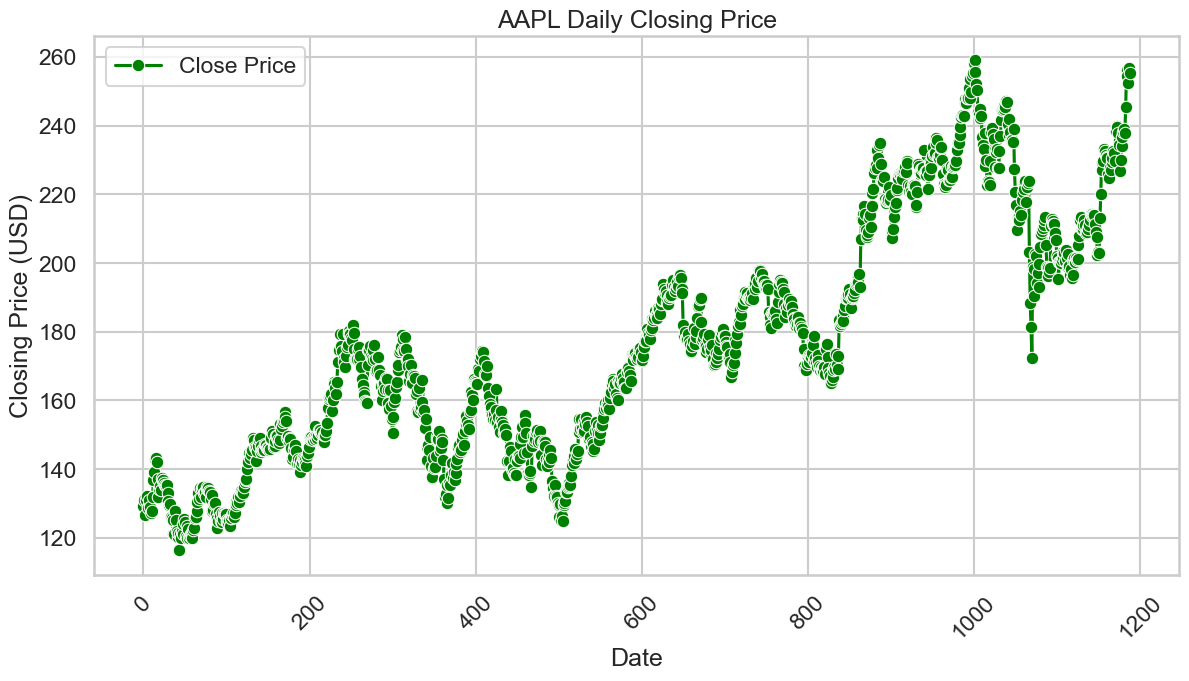

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")      
sns.set_context("talk")         

plt.figure(figsize=(14,7))
sns.lineplot(x=df.index, y=df['close'], marker='o', color='green', label='Close Price')

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("AAPL Daily Closing Price")

plt.xticks(rotation=45)

plt.legend()
plt.show()

In [92]:
import numpy as np

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [86]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [87]:
training_size,test_size

(772, 417)

In [89]:
len(train_data)

772

In [93]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [94]:
# reshaped into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
'''The create_dataset function transforms a raw sequence of data (like historical stock prices) into a format 
suitable for supervised learning. Time series data is often treated as a supervised learning problem where the 
model learns to predict a future value based on a sequence of past values. 
This is also known as a lagged feature or sliding window approach.'''

In [95]:
print(X_train.shape), print(y_train.shape)

(671, 100)
(671,)


(None, None)

In [96]:
print(X_test.shape), print(ytest.shape)

(316, 100)
(316,)


(None, None)

In [97]:
#LSTM always wants 3D input: [samples, timesteps, features]
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [98]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [99]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 362ms/step - loss: 0.0438 - val_loss: 0.0202
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - loss: 0.0075 - val_loss: 0.0354
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - loss: 0.0049 - val_loss: 0.0362
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - loss: 0.0037 - val_loss: 0.0092
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - loss: 0.0026 - val_loss: 0.0064
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 0.0021 - val_loss: 0.0045
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 

In [102]:
# Did the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step  
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step 


In [103]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [104]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

162.3552881027838

In [105]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

224.4482961841498

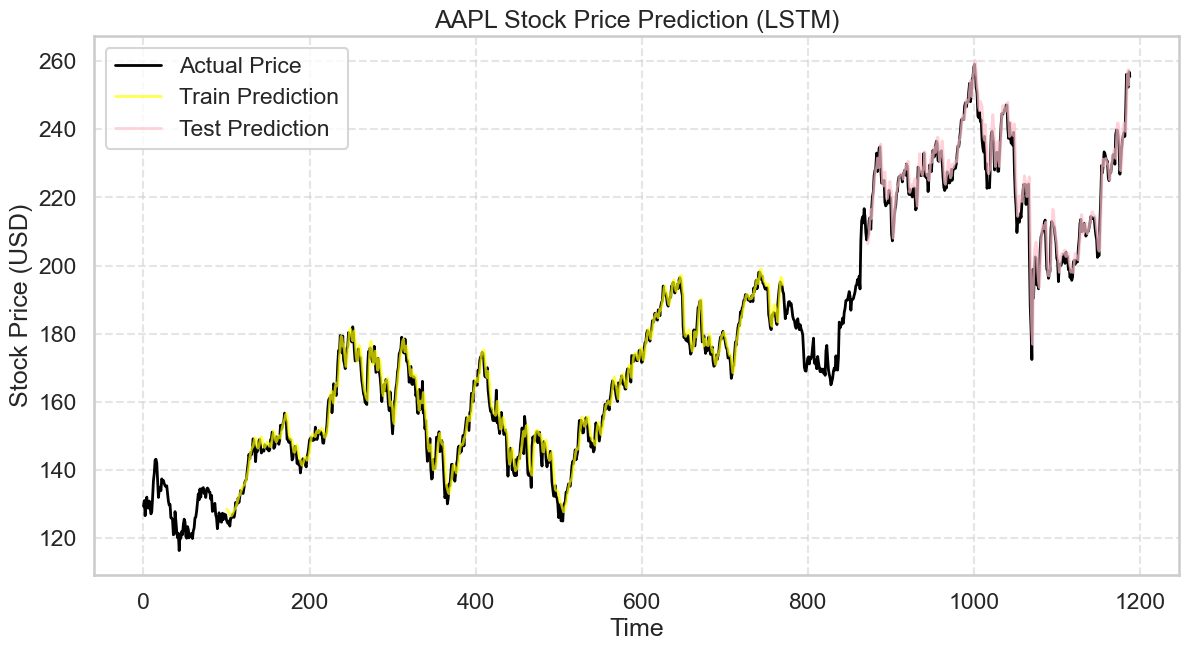

In [110]:
sns.set_style("whitegrid")
sns.set_context("talk")

look_back = 100  # adjust if needed

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.figure(figsize=(14,7))
plt.plot(scaler.inverse_transform(df1), label="Actual Price", color="black", linewidth=2)
plt.plot(trainPredictPlot, label="Train Prediction", color="yellow", linewidth=2, alpha=0.7)
plt.plot(testPredictPlot, label="Test Prediction", color="pink", linewidth=2, alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("AAPL Stock Price Prediction (LSTM)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [111]:
len(test_data) #For determining previous 100 days

417

In [112]:
x_input=test_data[317:].reshape(1,-1)
x_input.shape

(1, 100)

In [113]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [114]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.969395]
101
1 day input [0.5600028  0.5686948  0.57598486 0.66192345 0.67692416 0.67271835
 0.66654984 0.665218   0.64783401 0.63437544 0.6009393  0.59582223
 0.55313332 0.58776111 0.58923314 0.5859386  0.5922473  0.59820552
 0.60921071 0.60605636 0.59070517 0.613767   0.59645311 0.60500491
 0.57773728 0.58068134 0.56140474 0.5752138  0.5557269  0.562316
 0.59329875 0.59680359 0.58839198 0.59722417 0.59329875 0.59385953
 0.62252909 0.64110472 0.67348942 0.68127015 0.65603533 0.65645591
 0.66437684 0.67327913 0.66451703 0.64671246 0.6501472  0.65750736
 0.65652601 0.66465723 0.6737698  0.68722838 0.68547596 0.68274218
 0.68358335 0.68477499 0.6652881  0.64972662 0.63935231 0.6029721
 0.60977148 0.60675733 0.67916725 0.72669284 0.79202299 0.776812
 0.79412589 0.81992149 0.81606617 0.80772466 0.80281789 0.8005047
 0.76861068 0.76082995 0.78087761 0.77667181 0.7917426  0.80001402
 0.81452404 0.81157998 0.79461657 0.85595121 0.86513388 0.86450301
 0.85181551 0.82707136 0.77407823 0.79678

In [115]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [116]:
len(df1)

1189

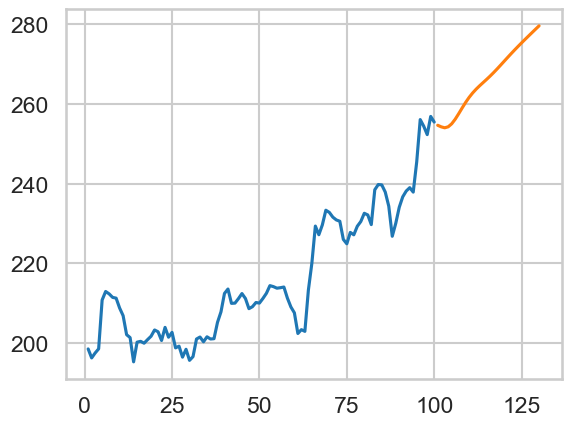

In [117]:
plt.plot(day_new,scaler.inverse_transform(df1[1089:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

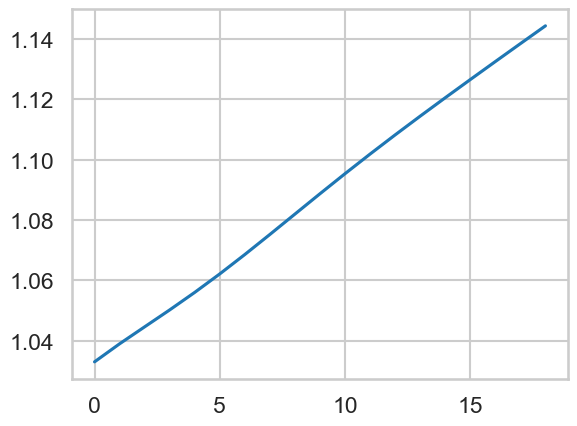

In [118]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [119]:
df3=scaler.inverse_transform(df3).tolist()

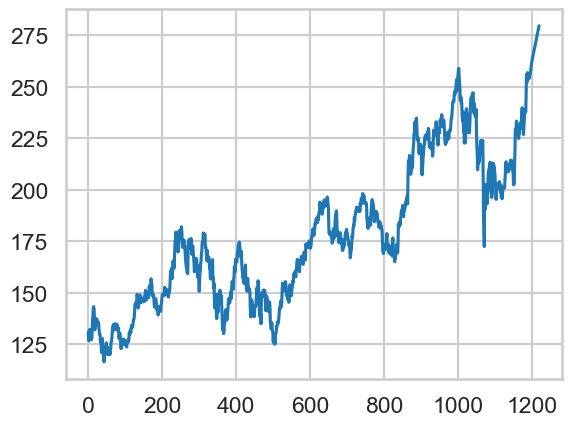

In [120]:
plt.plot(df3)

In [121]:
# Testing Bidirectional LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional

model_bi = Sequential()
model_bi.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(time_step, 1))))
model_bi.add(Bidirectional(LSTM(50)))
model_bi.add(Dense(1))
model_bi.compile(loss='mean_squared_error', optimizer='adam')

model_bi.summary()

model_bi.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

train_predict_bi = model_bi.predict(X_train)
test_predict_bi = model_bi.predict(X_test)

train_predict_bi = scaler.inverse_transform(train_predict_bi)
test_predict_bi = scaler.inverse_transform(test_predict_bi)

rmse_train_bi = math.sqrt(mean_squared_error(y_train, train_predict_bi))
rmse_test_bi = math.sqrt(mean_squared_error(ytest, test_predict_bi))
print(f"Bi-LSTM Train RMSE: {rmse_train_bi}")
print(f"Bi-LSTM Test RMSE: {rmse_test_bi}")

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 310ms/step - loss: 0.0248 - val_loss: 0.0300
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0064 - val_loss: 0.0118
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0034 - val_loss: 0.0127
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0023 - val_loss: 0.0042
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 


--- MODEL PERFORMANCE COMPARISON ---
                        RMSE     MAE  R2 Score
Stacked LSTM (Train)  3.2522  2.5308    0.9680
Stacked LSTM (Test)   4.6305  3.2944    0.9094
Bi-LSTM (Train)       3.1669  2.5081    0.9696
Bi-LSTM (Test)        6.4757  5.3480    0.8229


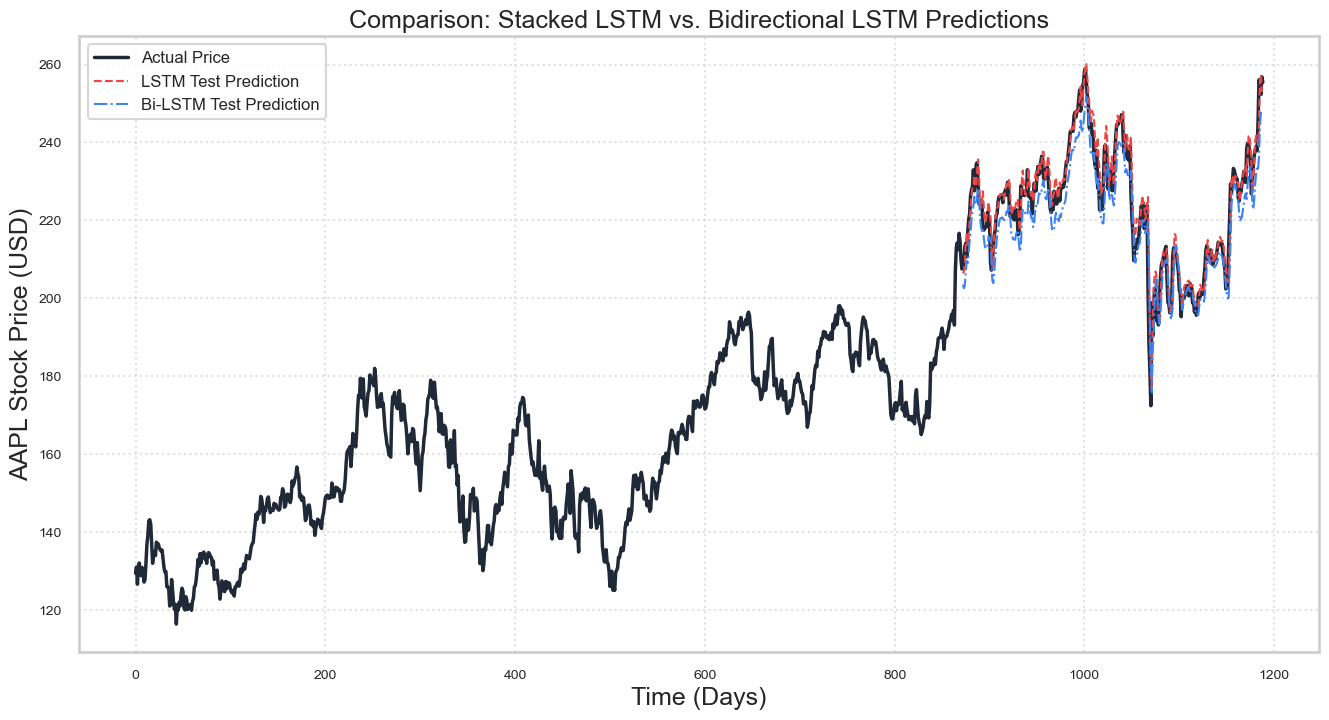

In [127]:
# --- PERFORMANCE METRICS CALCULATION AND COMPARISON ---

import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Helper function to calculate all metrics
def calculate_metrics(y_true_scaled, y_pred_inv_scaled, scaler_obj):
    # Inverse transform true values for correct RMSE, MAE calculation
    # We must ensure y_true is also inverse transformed
    y_true_inv_scaled = scaler_obj.inverse_transform(y_true_scaled.reshape(-1, 1))

    # RMSE (Root Mean Squared Error)
    rmse = math.sqrt(mean_squared_error(y_true_inv_scaled, y_pred_inv_scaled))
    
    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_true_inv_scaled, y_pred_inv_scaled)
    
    # R2 Score (Coefficient of Determination)
    r2 = r2_score(y_true_inv_scaled, y_pred_inv_scaled)
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    }

# 1. Stacked LSTM Metrics
metrics_lstm_train = calculate_metrics(y_train, train_predict, scaler)
metrics_lstm_test = calculate_metrics(ytest, test_predict, scaler)

# 2. Bi-LSTM Metrics
metrics_bi_train = calculate_metrics(y_train, train_predict_bi, scaler)
metrics_bi_test = calculate_metrics(ytest, test_predict_bi, scaler)

# creating Comparison DataFrame
data_comparison = {
    'Stacked LSTM (Train)': metrics_lstm_train,
    'Stacked LSTM (Test)': metrics_lstm_test,
    'Bi-LSTM (Train)': metrics_bi_train,
    'Bi-LSTM (Test)': metrics_bi_test
}

df_comparison = pd.DataFrame(data_comparison).T # Transpose for better readability
df_comparison['RMSE'] = df_comparison['RMSE'].round(4)
df_comparison['MAE'] = df_comparison['MAE'].round(4)
df_comparison['R2 Score'] = df_comparison['R2 Score'].round(4)

print("\n--- MODEL PERFORMANCE COMPARISON ---")
print(df_comparison)
look_back = 100

# 1. Prepared Prediction Plots for Stacked LSTM (requires inverse scaling of predictions first)
trainPredictPlot_lstm = np.empty_like(scaler.inverse_transform(df1))
trainPredictPlot_lstm[:, :] = np.nan
trainPredictPlot_lstm[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot_lstm = np.empty_like(scaler.inverse_transform(df1))
testPredictPlot_lstm[:, :] = np.nan
testPredictPlot_lstm[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# 2. Prepared Prediction Plots for Bi-LSTM (requires inverse scaling of predictions first)
trainPredictPlot_bi = np.empty_like(scaler.inverse_transform(df1))
trainPredictPlot_bi[:, :] = np.nan
trainPredictPlot_bi[look_back:len(train_predict_bi)+look_back, :] = train_predict_bi

testPredictPlot_bi = np.empty_like(scaler.inverse_transform(df1))
testPredictPlot_bi[:, :] = np.nan
testPredictPlot_bi[len(train_predict_bi)+(look_back*2)+1:len(df1)-1, :] = test_predict_bi

# Plot Both Test Predictions against Actual Data
plt.figure(figsize=(16, 8))
plt.plot(scaler.inverse_transform(df1), label="Actual Price", color="#1f2937", linewidth=2.5) # Dark Gray/Black

# Plotting Test Predictions
plt.plot(testPredictPlot_lstm, label="LSTM Test Prediction", color="#ef4444", linewidth=1.5, linestyle='--') # Red
plt.plot(testPredictPlot_bi, label="Bi-LSTM Test Prediction", color="#3b82f6", linewidth=1.5, linestyle='-.') # Blue

plt.xlabel("Time (Days)")
plt.ylabel(f"{ticker} Stock Price (USD)")
plt.title(f"Comparison: Stacked LSTM vs. Bidirectional LSTM Predictions")
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### Observations:

<style>
.comparison-table {
width: 100%;
border-collapse: collapse;
margin: 20px 0;
font-family: 'Inter', sans-serif;
}
.comparison-table th, .comparison-table td {
border: 1px solid #ddd;
padding: 12px;
text-align: center;
}
.comparison-table th {
background-color: #f3f4f6;
color: #1f2937;
font-weight: 600;
position: sticky;
top: 0;
}
.comparison-table tr:nth-child(even) {
background-color: #f9fafb;
}
.comparison-table tr:hover {
background-color: #f1f5f9;
}
.better-result {
background-color: #d1fae5;
font-weight: bold;
color: #065f46;
}
.highlight-header {
background-color: #2563eb !important;
color: white !important;
}
h3 {
font-family: 'Inter', sans-serif;
color: #1f2937;
border-bottom: 2px solid #2563eb;
padding-bottom: 5px;
}
</style>

Stock Prediction Model Performance Comparison
The table below summarizes the performance metrics for the Stacked LSTM (unidirectional) and the Bidirectional LSTM (Bi-LSTM) models. Metrics include Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and the R-squared (R 
2
 ) Score.

<table class="comparison-table">
<thead>
<tr>
<th class="highlight-header">Model / Metric</th>
<th>RMSE</th>
<th>MAE</th>
<th>R² Score</th>
</tr>
</thead>
<tbody>
<tr>
<td>Stacked LSTM (Train)</td>
<td class="better-result">

3.2522
</td>
<td class="better-result">

2.5308
</td>
<td>

0.9680
</td>
</tr>
<tr>
<td>Stacked LSTM (Test)</td>
<td class="better-result">

4.6305
</td>
<td class="better-result">

3.2944
</td>
<td class="better-result">

0.9094
</td>
</tr>
<tr>
<td>Bi-LSTM (Train)</td>
<td>

3.1669
</td>
<td>

2.5081
</td>
<td class="better-result">

0.9696
</td>
</tr>
<tr>
<td>Bi-LSTM (Test)</td>
<td>

6.4757
</td>
<td>

5.3480
</td>
<td>

0.8229
</td>
</tr>
</tbody>
</table>

Analysis and Conclusion
Based on the evaluation metrics, the Stacked LSTM model is the clear choice for this specific prediction task, demonstrating superior generalization capability on unseen test data.

Stacked LSTM is the Better Model for Testing: The Stacked LSTM significantly outperformed the Bi-LSTM on the critical Testing Set across all metrics.

RMSE (4.6305 vs. 6.4757): The Stacked LSTM has a much lower RMSE, meaning its predictions are closer to the actual values and it made fewer large errors.

MAE (3.2944 vs. 5.3480): The average absolute error is lower for the Stacked LSTM, indicating that on a daily basis, its predictions are closer to the true price.

R 
2
  Score (0.9094 vs. 0.8229): The Stacked LSTM explains approximately 9% more of the price variance on the unseen test data than the Bi-LSTM (90.94% vs. 82.29%).

Overfitting/Setup Issue in Bi-LSTM:

Both models performed extremely well on the Training Set (high R 
2
 ), with the Bi-LSTM showing slightly less training error (lower RMSE/MAE).

However, the Bi-LSTM's performance dropped sharply on the Testing Set. This suggests the Bi-LSTM model, despite its theoretical advantage of processing data bidirectionally, is overfitting to the training data. It learned the noise and specific patterns of the training data too well, leading to poor generalization.

Recommendation: The Stacked LSTM architecture is recommended for deployment given its robust performance on the independent test data. If you wished to continue with the Bi-LSTM, further regularization techniques (like more dropout or early stopping) would be necessary to prevent overfitting.